<h1>Loading Libraries</h1>

In [1]:
import seaborn as sns
import io
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from wordcloud import WordCloud, STOPWORDS , ImageColorGenerator
import datetime as dt
import string
from collections import OrderedDict
import unicodedata
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import SGDClassifier
plt.style.use('ggplot')
import spacy
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold
from itertools import tee
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Perceptron
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.linear_model import LogisticRegression
import numpy as np

from keras.models import Sequential, load_model
from keras.layers import Dense, LSTM, Embedding, Dropout
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from bs4 import BeautifulSoup
from gensim import corpora, models, similarities
from sklearn.model_selection import KFold
from itertools import tee
from sklearn.metrics import confusion_matrix, accuracy_score
import re
import pandas as pd
import nltk
import os
import time
from nltk.tokenize.toktok import ToktokTokenizer #importing tiktok
tokenizers = ToktokTokenizer() #initializing tokenizer
stopwords_list = nltk.corpus.stopwords.words('english') #importing stopwords

Using TensorFlow backend.


<h1> Data Loading </h1>

In [2]:
twitter_data = pd.read_csv('Tweets.csv') #reading file containing tweets
twitter_data_copy = twitter_data #making copy for usage
twitter_data_visualization = pd.read_csv('Tweets.csv') #making copy for visualization
twitter_data_copy = twitter_data_copy.text.dropna() #removing null values
twitter_data_copy = twitter_data_copy.reset_index(drop=True) #resetting index
twitter_data.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


<h1> Data Visualization </h1>

In [3]:
df_text  = pd.DataFrame(twitter_data_visualization['text']) #extracting column of text



<h1> WordCloud</h1>

(-0.5, 399.5, 199.5, -0.5)

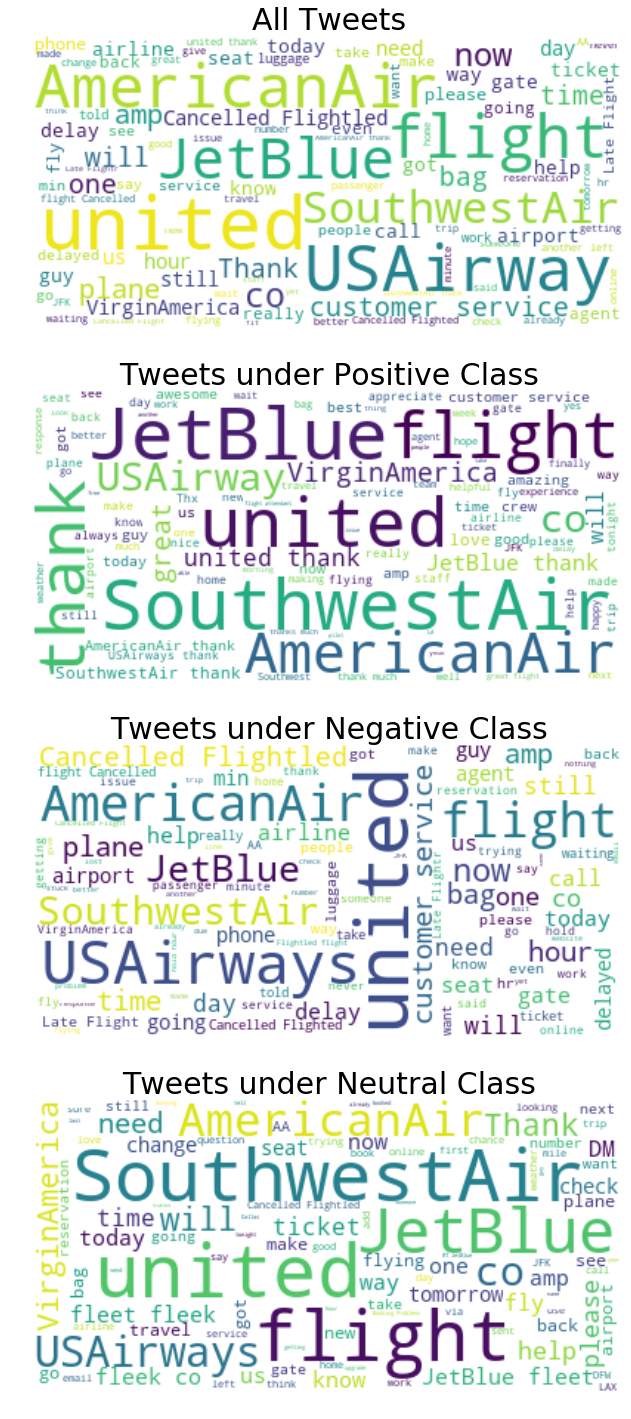

In [4]:
df_positive = twitter_data_visualization[twitter_data_visualization['airline_sentiment']=='positive'] #positive words
df_negative = twitter_data_visualization[twitter_data_visualization['airline_sentiment']=='negative']#negatie words
df_neutral = twitter_data_visualization[twitter_data_visualization['airline_sentiment']=='neutral']#neutral words
all_tweets = " ".join(review for review in df_text.text) #common words of all tweets
tweet_pos = " ".join(review for review in df_positive['text'])#combining positive words
tweet_neg = " ".join(review for review in df_negative['text'])#combining negative words
tweet_neut = " ".join(review for review in df_neutral['text'])#combining neutral words

imgg, axx = plt.subplots(4, 1, figsize  = (25,25)) #initializing image plot

whole_text = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(all_tweets) #setting text
positive_text = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_pos)#setting positive text
negative_text = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_neg)#setting negative text
neutral_text = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(tweet_neut)#setting neutral text

axx[0].imshow(whole_text, interpolation='bilinear')#showing text
axx[0].set_title('All Tweets', fontsize=30)#setting title
axx[0].axis('off') #setting off axis numbers
axx[1].imshow(positive_text, interpolation='bilinear')
axx[1].set_title('Tweets under Positive Class',fontsize=30)
axx[1].axis('off')
axx[2].imshow(negative_text, interpolation='bilinear')
axx[2].set_title('Tweets under Negative Class',fontsize=30)
axx[2].axis('off')
axx[3].imshow(neutral_text, interpolation='bilinear')
axx[3].set_title('Tweets under Neutral Class', fontsize=30)
axx[3].axis('off')

<h3> Airlines in the dataset </h3>

In [5]:
tweet_created_for_visualization = []
for dd in twitter_data_visualization.tweet_created:
    tweet_created_for_visualization.append(dd[:19])

In [6]:
twitter_data_visualization.airline.value_counts(ascending=True) #count of airlines

Virgin America     504
Delta             2222
Southwest         2420
American          2759
US Airways        2913
United            3822
Name: airline, dtype: int64

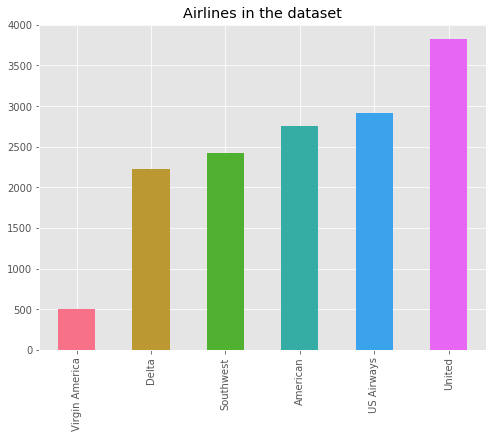

In [7]:
pd.Series(twitter_data_visualization["airline"]).value_counts(ascending=True).plot(kind = "bar",color=sns.color_palette("husl"),figsize=(8,6),
            fontsize=10,label=True, title = "Airlines in the dataset") # visualizing count of airlines

In [8]:
twitter_data_visualization['tweet_created'] = pd.to_datetime(twitter_data_visualization.tweet_created) #converting to datetime format
twitter_data_visualization['tweet_created_date'] = twitter_data_visualization.tweet_created.dt.date #extracting date
twitter_data_visualization['tweet_created_time'] = twitter_data_visualization.tweet_created.dt.time #extracting time
twitter_data_visualization['tweet_created_hour'] = twitter_data_visualization.tweet_created.dt.hour #extracting hour

<h3> Sentiments Count </h3>

In [9]:
pd.Series(twitter_data_visualization["airline_sentiment"]).value_counts(ascending=True) #counting sentiments

positive    2363
neutral     3099
negative    9178
Name: airline_sentiment, dtype: int64

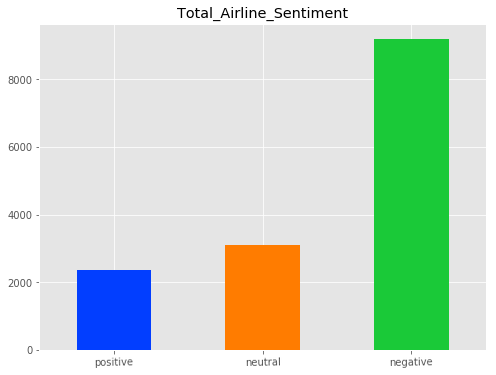

In [10]:
colors_filling=sns.color_palette("bright", 10)
total_count=pd.Series(twitter_data_visualization["airline_sentiment"]).value_counts(ascending=True).plot(
    kind = "bar",color=colors_filling,figsize=(8,6),rot=1, title = "Total_Airline_Sentiment") #visualizing sentiments

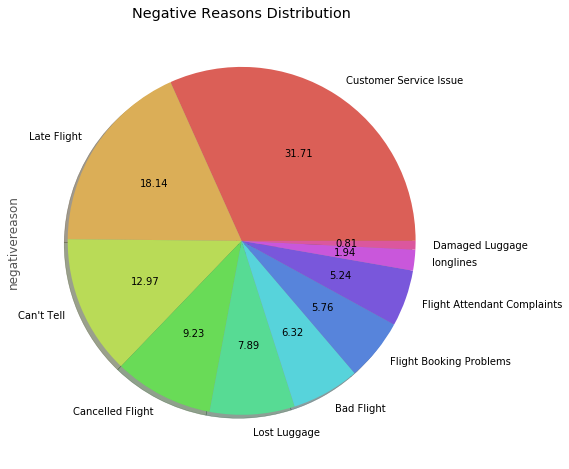

In [11]:
colors_filling=sns.color_palette("hls", 10) #setting colors palete
pd.Series(twitter_data_visualization["negativereason"]).value_counts().plot(
    kind="pie",colors=colors_filling,figsize=(8,8),shadow=True,autopct='%.2f',
    title = "Negative Reasons Distribution")# visualizing negative reasons

<h3> Different Timezones of User </h3>

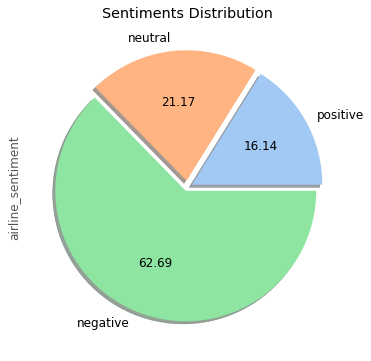

In [12]:
colors_filling=sns.color_palette("pastel",74)
pd.Series(twitter_data_visualization["airline_sentiment"]).value_counts(ascending=True).plot(
    kind="pie",colors=colors_filling,labels=["positive", "neutral", "negative"],explode=[0.04,0.05,0.03]
    ,shadow=True,autopct='%.2f', fontsize=12,figsize=(6, 6),title = "Sentiments Distribution")#visualizing sentiments using pie

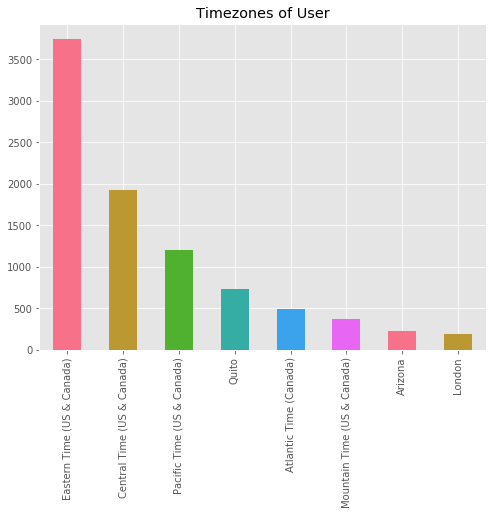

In [13]:
pd.Series(twitter_data_visualization["user_timezone"]).value_counts().head(8).plot(kind = "bar",color=sns.color_palette("husl"),figsize=(8,6),title = "Timezones of User")#visualizing timezones of user 





In [14]:
air_sentiments_dist=pd.crosstab( twitter_data_visualization.airline_sentiment,twitter_data_visualization.airline)#sentiments for different airlines
air_sentiments_dist #output 

airline,American,Delta,Southwest,US Airways,United,Virgin America
airline_sentiment,,,,,,
negative,1960,955,1186,2263,2633,181
neutral,463,723,664,381,697,171
positive,336,544,570,269,492,152


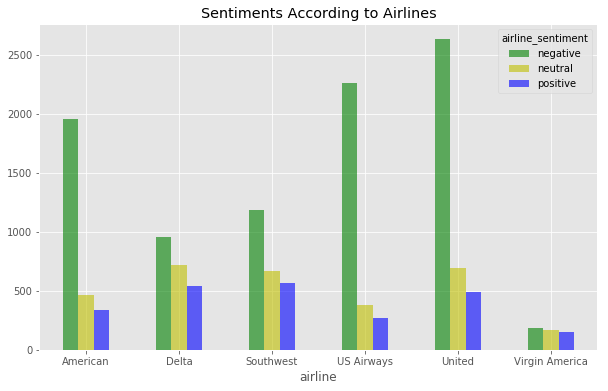

In [15]:
pd.crosstab(index = twitter_data_visualization["airline"],columns = twitter_data_visualization["airline_sentiment"]).plot(kind='bar',color=['g','y','blue'],figsize=(10, 6),alpha=0.6,rot=0,title="Sentiments According to Airlines") #visualizing sentiments of Airlines

In [16]:
percentage_division_of_sentiments=air_sentiments_dist.apply(lambda y: y / y.sum() * 100, axis=0)#percentage for sentiments
percentage_division_of_sentiments#output for percentage sentiments

airline,American,Delta,Southwest,US Airways,United,Virgin America
airline_sentiment,,,,,,
negative,71.040232,42.979298,49.008264,77.686234,68.890633,35.912698
neutral,16.781443,32.538254,27.438017,13.079300,18.236525,33.928571
positive,12.178325,24.482448,23.553719,9.234466,12.872841,30.158730


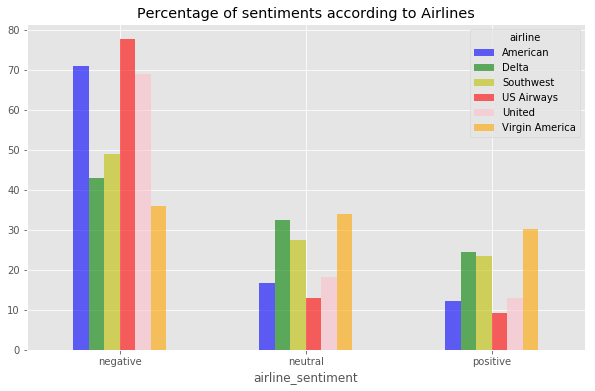

In [17]:
percentage_division_of_sentiments.plot(kind='bar',figsize=(10, 6),alpha=0.6, color=['b','g','y','r','pink','orange'],
                rot=0,title="Percentage of sentiments according to Airlines",) #visualizing percentage of sentiments

<h3> Grouping of Sentiments By date</h3>

In [18]:
sentiments_datewise=pd.crosstab( twitter_data_visualization.airline_sentiment,twitter_data_visualization.tweet_created_date)#sentiments by date
sentiments_datewise#output for sentiments datewise

tweet_created_date,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-21,2015-02-22,2015-02-23,2015-02-24
airline_sentiment,,,,,,,,,
negative,3,838,736,751,835,1049,2266,1919,781
neutral,1,297,335,329,383,278,463,676,337
positive,0,273,273,296,282,230,350,433,226


In [19]:
dates_percentage=sentiments_datewise.apply(lambda y: y / y.sum() * 100, axis=0)#% of sentiments by date
dates_percentage#displaying output for % of sentiments by date

tweet_created_date,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-21,2015-02-22,2015-02-23,2015-02-24
airline_sentiment,,,,,,,,,
negative,75.0,59.517045,54.761905,54.578488,55.666667,67.373154,73.595323,63.375165,58.110119
neutral,25.0,21.093750,24.925595,23.909884,25.533333,17.854849,15.037350,22.324967,25.074405
positive,0.0,19.389205,20.312500,21.511628,18.800000,14.771997,11.367327,14.299868,16.815476


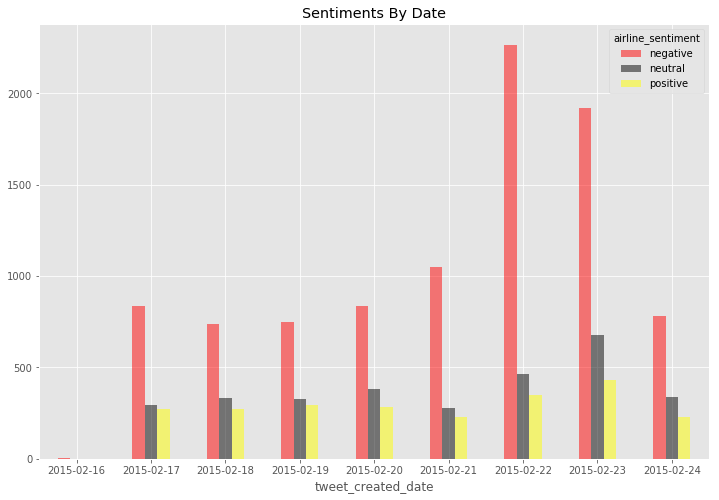

In [20]:
pd.crosstab(index = twitter_data_visualization["tweet_created_date"],columns = twitter_data_visualization["airline_sentiment"]).plot(kind='bar',figsize=(12, 8),color=['red','black','yellow'],alpha=0.5,rot=0,title="Sentiments By Date")#visualizing sentiments by date

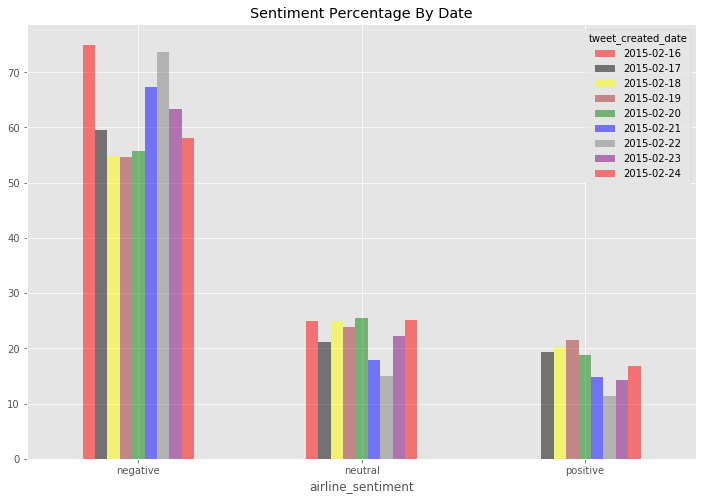

In [21]:
dates_percentage.plot(kind='bar',figsize=(12, 8),color=['red','black','yellow','brown','green','blue','grey','purple'],alpha=0.5,rot=0,title="Sentiment Percentage By Date")#percentage of sentiments by date

In [22]:
td_counting_values = twitter_data_visualization.groupby(['tweet_created_date','airline'])#grouping sentiments datewise according to airlines
td_counting_values = td_counting_values.airline_sentiment.value_counts(ascending=True)#sorting datewise
td_counting_values.unstack()#unstacking the series object

airline_sentiment                  negative  neutral  positive
tweet_created_date airline                                    
2015-02-16         Delta                1.0      1.0       NaN
                   United               2.0      NaN       NaN
2015-02-17         Delta              108.0     86.0      69.0
                   Southwest          213.0     85.0      86.0
                   US Airways         233.0     30.0      48.0
                   United             272.0     75.0      49.0
                   Virgin America      12.0     21.0      21.0
2015-02-18         American             1.0      NaN       NaN
                   Delta              105.0     86.0      77.0
                   Southwest          110.0    106.0      76.0
                   US Airways         244.0     32.0      41.0
                   United             257.0     90.0      59.0
                   Virgin America      19.0     21.0      20.0
2015-02-19         American             NaN      NaN       1.0
                   Delta              135.0     70.0      78.0
                   Southwest          127.0     94.0      96.0
                   US Airways         193.0     54.0      32.0
                   United             272.0     85.0      69.0
                   Virgin America      24.0     26.0      20.0
2015-02-20         American             1.0      NaN       NaN
                   Delta               91.0     90.0      70.0
                   Southwest          132.0    110.0      77.0
                   US Airways         248.0     52.0      33.0
                   United             342.0     99.0      85.0
                   Virgin America      21.0     32.0      17.0
2015-02-21         American             1.0      NaN       NaN
                   Delta               98.0     79.0      66.0
                   Southwest          257.0     60.0      53.0
                   US Airways         291.0     39.0      30.0
                   United             365.0     88.0      53.0
                   Virgin America      37.0     12.0      28.0
2015-02-22         American           762.0    132.0      94.0
                   Delta              255.0     76.0      77.0
                   Southwest          129.0     77.0      73.0
                   US Airways         561.0     60.0      27.0
                   United             532.0    102.0      69.0
                   Virgin America      27.0     16.0      10.0
2015-02-23         American           826.0    178.0     137.0
                   Delta              125.0    195.0      71.0
                   Southwest          116.0     83.0      77.0
                   US Airways         372.0     74.0      42.0
                   United             449.0    109.0      83.0
                   Virgin America      31.0     37.0      23.0
2015-02-24         American           369.0    153.0     104.0
                   Delta               37.0     40.0      36.0
                   Southwest          102.0     49.0      32.0
                   US Airways         121.0     40.0      16.0
                   United             142.0     49.0      25.0
                   Virgin America      10.0      6.0      13.0

<h3>Negative Reasons By Date</h3>

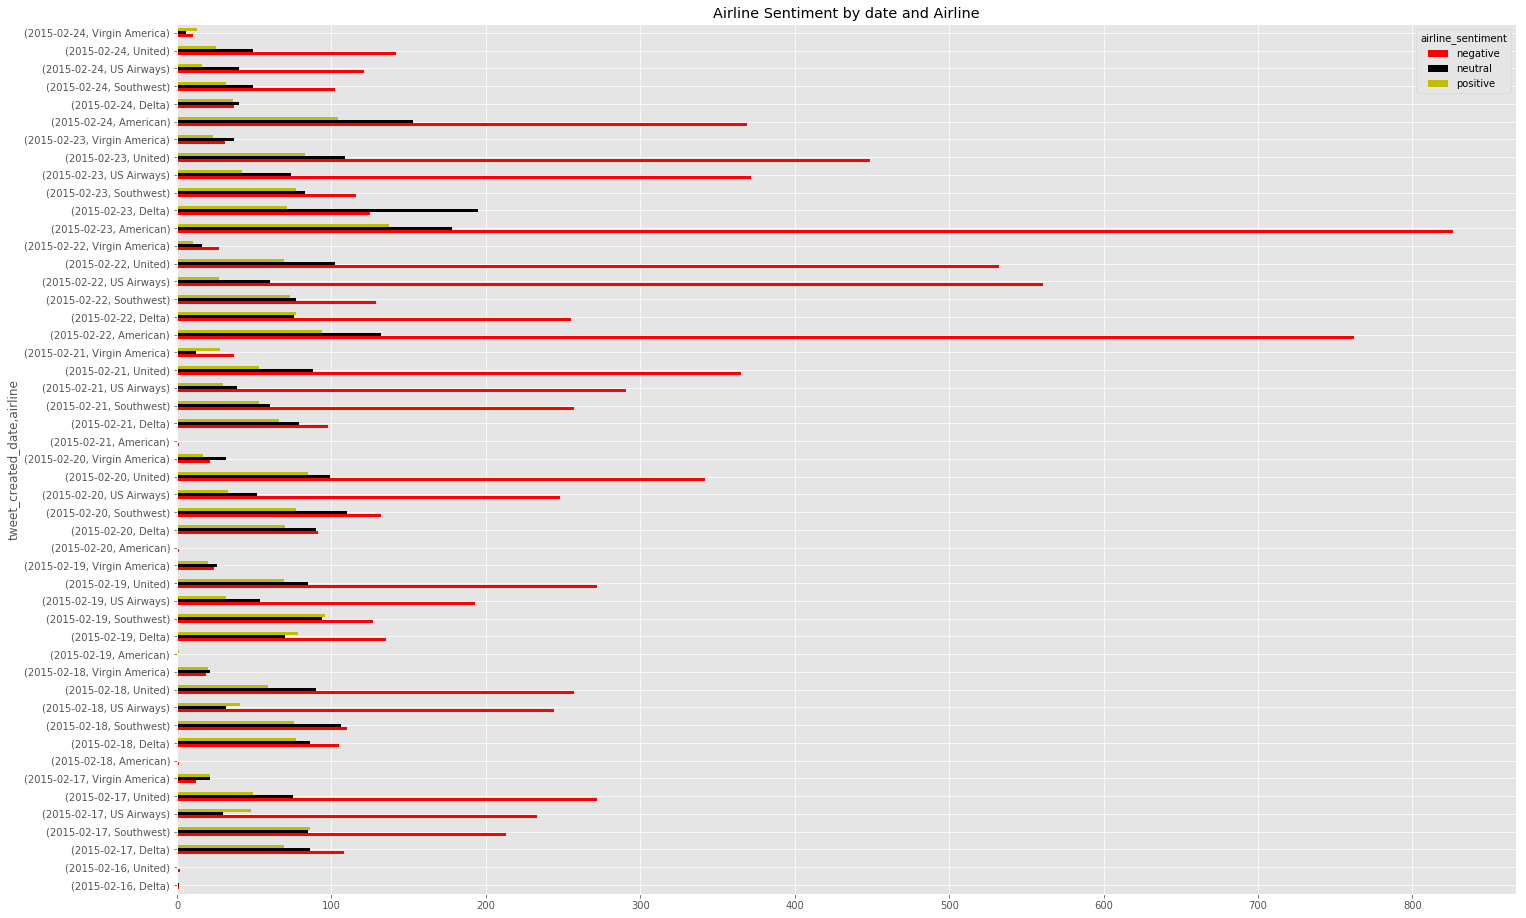

In [23]:
td_counting_values.unstack().plot(kind='barh',figsize=(24, 16),color=['r','black','y'],title="Airline Sentiment by date and Airline")#visualizing negative reasons by date 

In [24]:
date_creation_values = twitter_data_visualization.groupby(['negativereason']).tweet_created_date.value_counts()#number of negative reasons by date
date_creation_values.unstack()#unstacking series object showing number of tweets

tweet_created_date,2015-02-16,2015-02-17,2015-02-18,2015-02-19,2015-02-20,2015-02-21,2015-02-22,2015-02-23,2015-02-24
negativereason,,,,,,,,,
Bad Flight,NaN,52.0,55.0,65.0,66.0,63.0,126.0,91.0,62.0
Can't Tell,1.0,97.0,98.0,110.0,122.0,128.0,239.0,284.0,111.0
Cancelled Flight,NaN,93.0,36.0,46.0,45.0,131.0,268.0,163.0,65.0
Customer Service Issue,NaN,278.0,222.0,199.0,231.0,346.0,718.0,676.0,240.0
Damaged Luggage,NaN,11.0,10.0,5.0,5.0,7.0,15.0,15.0,6.0
Flight Attendant Complaints,NaN,50.0,40.0,35.0,47.0,50.0,124.0,84.0,51.0
Flight Booking Problems,NaN,43.0,57.0,57.0,52.0,47.0,99.0,117.0,57.0
Late Flight,2.0,142.0,129.0,182.0,202.0,173.0,454.0,279.0,102.0
Lost Luggage,NaN,62.0,72.0,34.0,53.0,77.0,169.0,187.0,70.0


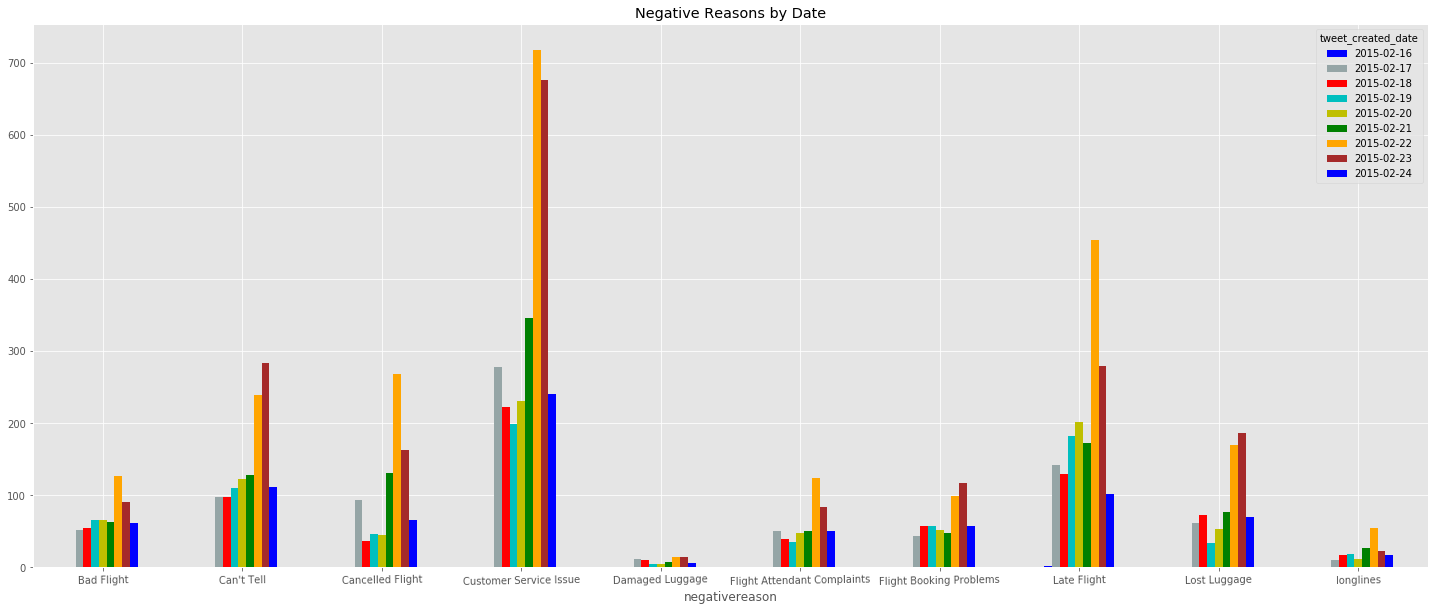

In [25]:
date_creation_values.unstack().plot(kind='bar',stacked=False,figsize=(25, 10),color=['b','#95a5a6','r','c','y','g','orange','brown'],rot=1,title="Negative Reasons by Date")#visualizing datewise negative reasons

<h3>Negative Reasons By Time</h3>

In [26]:
hour_value_counts = twitter_data_visualization.groupby(['tweet_created_hour']).negativereason.value_counts() #number of negative reasons by time
hour_value_counts.unstack()#unstacking values for output



negativereason,Bad Flight,Can't Tell,Cancelled Flight,Customer Service Issue,Damaged Luggage,Flight Attendant Complaints,Flight Booking Problems,Late Flight,Lost Luggage,longlines
tweet_created_hour,,,,,,,,,,
0,10.0,14.0,11.0,27.0,NaN,4.0,2.0,13.0,15.0,1.0
1,3.0,15.0,3.0,29.0,3.0,3.0,3.0,7.0,13.0,1.0
2,3.0,11.0,7.0,46.0,NaN,11.0,3.0,11.0,14.0,3.0
3,10.0,17.0,17.0,51.0,1.0,3.0,5.0,21.0,17.0,4.0
4,15.0,33.0,20.0,74.0,2.0,18.0,13.0,38.0,21.0,2.0
5,20.0,32.0,33.0,108.0,2.0,16.0,18.0,61.0,20.0,3.0
6,34.0,54.0,36.0,138.0,1.0,20.0,16.0,63.0,25.0,8.0
7,21.0,56.0,51.0,168.0,2.0,24.0,28.0,88.0,28.0,9.0
8,40.0,59.0,50.0,206.0,2.0,22.0,34.0,102.0,30.0,11.0


Text(0, 0.5, 'Negative Reasons')

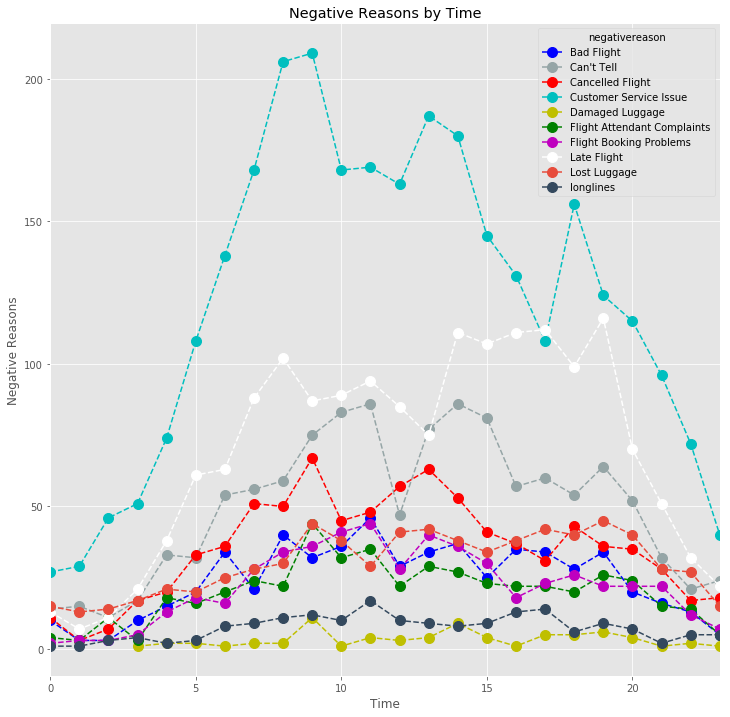

In [27]:
hour_value_counts_graph = hour_value_counts.unstack().plot(kind='line',marker='o',linestyle='dashed',markersize=10,color=['b','#95a5a6','r','c','y','g','m','w','#e74c3c','#34495e'],figsize=(12, 12),rot=0,title="Negative Reasons by Time")#visualizing number of negative reasons by time
hour_value_counts_graph.set_xlabel("Time")
hour_value_counts_graph.set_ylabel("Negative Reasons")

Text(0, 0.5, 'Negative Reasons')

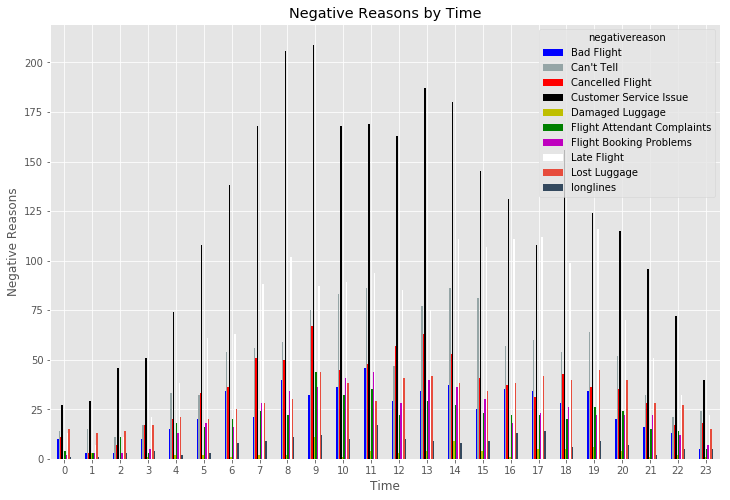

In [28]:
hour_value_counts_bargraph = hour_value_counts.unstack().plot(kind='bar',stacked=False,figsize=(12, 8),width=0.5,color=['b','#95a5a6','r','black','y','g','m','w','#e74c3c','#34495e'],rot=0,title="Negative Reasons by Time")#visualizing number of negative reasons by time
hour_value_counts_bargraph.set_xlabel("Time")
hour_value_counts_bargraph.set_ylabel("Negative Reasons")

<h1> Data Cleaning </h1>

In [29]:
text_correction_list = {"ain't": "am not", "what's": "what is","what've": "what have","when's": "when is","when've": "when have","where'd": "where did","where's": "where is","where've": "where have","who'll": "who will","who'll've": "who will have","who's": "who is","who've": "who have","why's": "why is","why've": "why have","will've": "will have","won't": "will not","won't've": "will not have",
  "would've": "would have","aren't": "are not","can't": "cannot","can't've": "cannot have","'cause": "because", "could've": "could have","couldn't": "could not", "couldn't've": "could not have", "didn't": "did not", "doesn't": "does not", "don't": "do not","hadn't": "had not", "hadn't've": "had not have", "hasn't": "has not", "haven't": "have not", "he'd": "he would", "he'd've": "he would have", "he'll": "he will", "he'll've": "he will have", "he's": "he is", "how'd": "how did", "how'd'y": "how do you", "how'll": "how will", "how's": "how is","I'd": "I would", "I'd've": "I would have","I'll": "I will","I'll've": "I will have","I'm": "I am","I've": "I have", "isn't": "is not","it'd": "it had","it'd've": "it would have", "it'll": "it will","it'll've": "it will have","it's": "it is", "let's": "let us", "ma'am": "madam","mayn't": "may not","might've": "might have","mightn't": "might not","mightn't've": "might not have","must've": "must have","mustn't": "must not","mustn't've": "must not have","needn't": "need not","needn't've": "need not have","o'clock": "of the clock", "oughtn't": "ought not","oughtn't've": "ought not have","shan't": "shall not","sha'n't": "shall not", "shan't've": "shall not have", "she'd": "she would","she'd've": "she would have","she'll": "she will","she'll've": "she will have", "she's": "she is",
  "there'd've": "there would have","there's": "there is","they'd": "they would","they'd've": "they would have","they'll": "they will",
  "they'll've": "they will have","they're": "they are","they've": "they have","to've": "to have","wasn't": "was not","we'd": "we had","should've": "should have",
  "shouldn't": "should not","shouldn't've": "should not have","so've": "so have", "so's": "so is","that'd": "that would","that'd've": "that would have","that's": "that is","there'd": "there had","we'd've": "we would have",
  "we'll": "we will", "we'll've": "we will have","we're": "we are","we've": "we have","weren't": "were not","what'll": "what will",
  "what'll've": "what will have", "what're": "what are","wouldn't": "would not","wouldn't've": "would not have","y'all": "you all","y'alls": "you alls",
  "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have","you'd": "you had","you'd've": "you would have","you'll": "youyou will","you'll've": "you will have","you're": "you are","you've": "you have"
}#list of abbreviations
compile_correct_words = re.compile('(%s)' % '|'.join(text_correction_list.keys()))##compiling abbreviations

In [30]:
def data_preprocessing(sentiment_text): #function for preprocessing
    expression_for_link    = re.compile('((https?):((//)|(\\\\))+([\w\d:#@%/;$()~_?\+-=\\\.&](#!)?)*)', re.DOTALL) #removing links
    processed_link         = re.findall(expression_for_link, sentiment_text) #finding above symbols in text
    for link in processed_link: #parsing each found symbol
        sentiment_text = sentiment_text.replace(link[0], ', ') #replacing symbol with space
    sentiment_text= remove_punctuation_marks(sentiment_text) #calling function remove_punctuation_marks
    sentiment_text= sentiment_text.replace('RT', '') #replacing RT with space
    def matching(match): #function for matching
        return text_correction_list[match.group(0)]#returning list for match
    sentiment_text = compile_correct_words.sub(matching, sentiment_text.lower())#converting text to lowercase
    extra_digits = r'[^a-zA-z0-9\s]'#checking extra digits
    sentiment_text = re.sub(extra_digits, '', sentiment_text) #remove extra digits
    sentiment_text = unicodedata.normalize('NFKD', sentiment_text).encode('ascii', 'ignore').decode('utf-8', 'ignore')# normalizing sentiment text
    return sentiment_text 

In [31]:
def remove_punctuation_marks(sentiment_text):
    at_the_rate_hashes = ['@','#'] # initializing array of symbols
    for p in  string.punctuation: #checking in punctuations
        if p not in at_the_rate_hashes : 
            sentiment_text = sentiment_text.replace(p,' ') #replacing punctuations with space
    processed_text = []
    for pt in sentiment_text.split(): #splitting text
        pt = pt.strip()
        if pt:
            if pt[0] not in at_the_rate_hashes: # checking and removing symbols
                processed_text.append(pt)
    return ' '.join(processed_text)

In [32]:
processed_tweets = []
for text in twitter_data_copy:
    processed_tweets.append(text.lower()) #collecting processed tweets

In [33]:
storing_processed_tweets=[]
for i in range(len(processed_tweets)):
    texting=data_preprocessing(processed_tweets[i])
    storing_processed_tweets.append(texting)    #storing processed tweets in list

<h1> Data Preprocessing </h1>

In [34]:
def converting_text_to_vector():
    c_v = CountVectorizer()
    #positive_and_negative_tweets = twitter_data[twitter_data.airline_sentiment != 'neutral']
    X_vector = c_v.fit_transform(positive_and_negative_tweets['cleaned_tweets'])

    tfidf_transformer = TfidfTransformer(norm='l2')
    X = tfidf_transformer.fit_transform(X_vector)
    y = positive_and_negative_tweets['airline_sentiment']
    return X,y

In [35]:
twitter_data['cleaned_tweets'] = storing_processed_tweets
positive_and_negative_tweets = twitter_data[twitter_data.airline_sentiment != 'neutral']
X,y=converting_text_to_vector()

<h1> Applying Models with only positive and negative sentiments<h1>

In [36]:
def calculate_precision_recall_flscore(confusion_matrix):
    confusion_matrix = np.array(confusion_matrix)
    precision = 0
    recall = 0
    n = len(confusion_matrix)
    for val in range(n):
        precision += (confusion_matrix[val][val] / (np.sum(confusion_matrix[:,val])))
        recall += (confusion_matrix[val][val] / (np.sum(confusion_matrix[val, :])))
    precision /= n
    recall /=n
    f1_score = ((2*precision*recall)/(precision+recall))
    return precision,recall,f1_score

In [37]:
from sklearn.model_selection import train_test_split
X_training, X_testing, y_training, y_testing = train_test_split(X, y, test_size=0.2)

<h3> K Nearest neighbors </h3>

In [38]:
accuracy_list_positive_and_negative=OrderedDict()
accuracy_mean_list_positive_and_negative=[]

In [39]:
def knn_working(X,y):
    kfolds = KFold(n_splits=5)
    train_test_data = kfolds.split(X)
    accuracy_list=[]
    starting_timing = time.time()
    print('Running for KNN only for positive and negative sentiments for 5 folds using K-fold')
    sum_of_accuracy = 0
    sum_f1_score = 0
    train_test_data, train_test_data_cp = tee(train_test_data)
    for td in train_test_data:
        y = np.array(y)
        x_d = X[td[0],:]
        y_d = ((y))[td[0]]
        knn_= KNeighborsClassifier(n_neighbors=11)
        calculate_knn=knn_.fit(x_d, y_d)
        y_predictions = calculate_knn.predict(X[td[1]])
        
        confusion = confusion_matrix(y[td[1]], y_predictions)
        precision,recall,f1_score= calculate_precision_recall_flscore(confusion)
        accuracy_value = accuracy_score(y[td[1]], y_predictions)
        sum_f1_score += f1_score
        sum_of_accuracy += accuracy_value
        accuracy_list.append(accuracy_value)
    print("completed in = ",time.time() - starting_timing)
    print("Confusion Matrix is \n ", confusion)
    print("Mean Accuracy is ",(sum_of_accuracy/5))
    accuracy_mean_list_positive_and_negative.append((sum_of_accuracy)/5)
    accuracy_list_positive_and_negative['knn']=accuracy_list
knn_working(X,y)

Running for KNN only for positive and negative sentiments for 5 folds using K-fold
completed in =  6.766647815704346
Confusion Matrix is 
  [[1886   86]
 [  92  244]]
Mean Accuracy is  0.8883980475766217


<h3> Decision Tree</h3>

In [40]:
def decision_tree_working(X,y):
    kfolds = KFold(n_splits=5)
    train_test_data = kfolds.split(X)
    accuracy_list=[]
    starting_timing = time.time()
    print('Running for Decision Tree only for positive and negative sentiments for 5 folds using K-fold')
    sum_of_accuracy = 0
    sum_f1_score = 0
    train_test_data, train_test_data_cp = tee(train_test_data)
    for td in train_test_data:
        y = np.array(y)
        x_d = X[td[0],:]
        y_d = ((y))[td[0]]
        dt_= DecisionTreeClassifier()
        calculate_dt_=dt_.fit(x_d, y_d)
        y_predictions = calculate_dt_.predict(X[td[1]])
        
        confusion = confusion_matrix(y[td[1]], y_predictions)
        precision,recall,f1_score= calculate_precision_recall_flscore(confusion)
        accuracy_value = accuracy_score(y[td[1]], y_predictions)
        sum_f1_score += f1_score
        sum_of_accuracy += accuracy_value
        accuracy_list.append(accuracy_value)
    print("completed in = ",time.time() - starting_timing)
    print("Confusion Matrix is \n ", confusion)
    print("Mean Accuracy is ",(sum_of_accuracy/5))
    accuracy_list_positive_and_negative['decision_tree']=accuracy_list
    accuracy_mean_list_positive_and_negative.append((sum_of_accuracy)/5)
decision_tree_working(X,y)

Running for Decision Tree only for positive and negative sentiments for 5 folds using K-fold
completed in =  12.575392007827759
Confusion Matrix is 
  [[1806  166]
 [ 123  213]]
Mean Accuracy is  0.8527850480337283


<h3> Stochastic Gradient Descent Algorithm</h3>

In [41]:
def sgdc_working(X,y):
    kfolds = KFold(n_splits=5)
    train_test_data = kfolds.split(X)
    accuracy_list=[]
    starting_timing = time.time()
    print('Running for SGDC Classifier only for positive and negative sentiments for 5 folds using K-fold')
    sum_of_accuracy = 0
    sum_f1_score = 0
    train_test_data, train_test_data_cp = tee(train_test_data)
    for td in train_test_data:
        y = np.array(y)
        x_d = X[td[0],:]
        y_d = ((y))[td[0]]
        sgdc_= SGDClassifier(loss = 'log')
        calculate_sgdc_= sgdc_.fit(x_d, y_d)
        y_predictions = calculate_sgdc_.predict(X[td[1]])
        confusion = confusion_matrix(y[td[1]], y_predictions)
        precision,recall,f1_score= calculate_precision_recall_flscore(confusion)
        accuracy_value = accuracy_score(y[td[1]], y_predictions) 
        sum_f1_score += f1_score
        sum_of_accuracy += accuracy_value
        accuracy_list.append(accuracy_value)
    print("completed in = ",time.time() - starting_timing)
    print("Confusion Matrix is \n ", confusion)
    print("Mean Accuracy is ",( sum_of_accuracy/5))
    accuracy_list_positive_and_negative['sgdc']=accuracy_list
    accuracy_mean_list_positive_and_negative.append((sum_of_accuracy)/5)
sgdc_working(X,y)

Running for SGDC Classifier only for positive and negative sentiments for 5 folds using K-fold


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


completed in =  0.3201298713684082
Confusion Matrix is 
  [[1950   22]
 [ 121  215]]
Mean Accuracy is  0.8996615609329179


<h3> Random Forest Classifier </h3>

In [42]:
def random_forest_working(X,y):
    kfolds = KFold(n_splits=5)
    train_test_data = kfolds.split(X)
    accuracy_list=[]
    starting_timing = time.time()
    print('running for Random Forest Classifier only for positive and negative sentiment for 5 folds using K-fold')
    sum_of_accuracy = 0
    sum_f1_score = 0
    train_test_data, train_test_data_cp = tee(train_test_data)
    for td in train_test_data:
        y = np.array(y)
        x_d = X[td[0],:]
        y_d = ((y))[td[0]]
        rfc_= RandomForestClassifier()
        calculate_rfc_= rfc_.fit(x_d, y_d)
        y_predictions = calculate_rfc_.predict(X[td[1]])
        confusion = confusion_matrix(y[td[1]], y_predictions)
        precision,recall,f1_score= calculate_precision_recall_flscore(confusion)
        accuracy_value = accuracy_score(y[td[1]], y_predictions)
        sum_f1_score += f1_score
        sum_of_accuracy += accuracy_value
        accuracy_list.append(accuracy_value)
    print("completed in = ",time.time() - starting_timing)
    print("Confusion Matrix is \n ", confusion)
    print("Mean Accuracy is ",( sum_of_accuracy/5))
    accuracy_list_positive_and_negative['rfc']=accuracy_list
    accuracy_mean_list_positive_and_negative.append((sum_of_accuracy)/5)
random_forest_working(X,y)

running for Random Forest Classifier only for positive and negative sentiment for 5 folds using K-fold


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

completed in =  6.772096157073975
Confusion Matrix is 
  [[1937   35]
 [ 188  148]]
Mean Accuracy is  0.8685555279506835


<h3> Perceptron Algorithm</h3>

In [43]:
def perceptron_working(X,y):
    kfolds = KFold(n_splits=5)
    train_test_data = kfolds.split(X)
    accuracy_list=[]
    starting_timing = time.time()
    print('Running for Perceptron only for positive and negative sentiments for 5 folds using K-fold')
    sum_of_accuracy = 0
    sum_f1_score = 0
    train_test_data, train_test_data_cp = tee(train_test_data)
    for td in train_test_data:
        y = np.array(y)
        x_d = X[td[0],:]
        y_d = ((y))[td[0]]
        perceptron_= Perceptron(tol=1e-3, random_state=0)
        calculate_perceptron_= perceptron_.fit(x_d, y_d)
        y_predictions = calculate_perceptron_.predict(X[td[1]])
        confusion = confusion_matrix(y[td[1]], y_predictions)
        precision,recall,f1_score= calculate_precision_recall_flscore(confusion)
        accuracy_value = accuracy_score(y[td[1]], y_predictions)
        
        sum_f1_score += f1_score
        sum_of_accuracy += accuracy_value
        accuracy_list.append(accuracy_value)
    print("completed in = ",time.time() - starting_timing)
    print("Confusion Matrix is \n ", confusion)
    print("Mean Accuracy is ",( sum_of_accuracy/5))
    accuracy_list_positive_and_negative['perceptron']=accuracy_list
    accuracy_mean_list_positive_and_negative.append((sum_of_accuracy)/5)
perceptron_working(X,y)

Running for Perceptron only for positive and negative sentiments for 5 folds using K-fold
completed in =  0.2261958122253418
Confusion Matrix is 
  [[1880   92]
 [  84  252]]
Mean Accuracy is  0.8928174958511377


<h3> Support Vector Classifier Algorithm </h3>

In [44]:
def svc_classifier(X,y):
    kfolds = KFold(n_splits=5)
    train_test_data = kfolds.split(X)
    accuracy_list=[]
    starting_timing = time.time()
    print('Running for Support Vector Classifier only for positive and negative sentiments for 5 folds using K-fold')
    sum_of_accuracy = 0
    sum_f1_score = 0
    train_test_data, train_test_data_cp = tee(train_test_data)
    for td in train_test_data:
        y = np.array(y)
        x_d = X[td[0],:]
        y_d = ((y))[td[0]]
        svc_= SVC(kernel="rbf", C=100., gamma=0.01, probability=True, degree=3)
        calculate_svc_= svc_.fit(x_d, y_d)
        y_predictions = calculate_svc_.predict(X[td[1]])
        confusion = confusion_matrix(y[td[1]], y_predictions)
        precision,recall,f1_score= calculate_precision_recall_flscore(confusion)
        accuracy_value = accuracy_score(y[td[1]], y_predictions)
        
        sum_f1_score += f1_score
        sum_of_accuracy += accuracy_value
        accuracy_list.append(accuracy_value)
    print("completed in = ",time.time() - starting_timing)
    print("Confusion Matrix is \n ", confusion)
    print("Mean Accuracy is ",( sum_of_accuracy/5))
    accuracy_list_positive_and_negative['svc']=accuracy_list
    accuracy_mean_list_positive_and_negative.append((sum_of_accuracy)/5)
svc_classifier(X,y)

Running for Support Vector Classifier only for positive and negative sentiments for 5 folds using K-fold
completed in =  143.63878202438354
Confusion Matrix is 
  [[1918   54]
 [  82  254]]
Mean Accuracy is  0.914478984727834


<h3> Logistic Regression </h3>

In [45]:
def logistic_regression_working(X,y):
    kfolds = KFold(n_splits=5)
    train_test_data = kfolds.split(X)
    accuracy_list=[]
    starting_timing = time.time()
    print('Running for Logistic Regression only for positive and negative sentiments for 5 folds using K-fold')
    sum_of_accuracy = 0
    sum_f1_score = 0
    train_test_data, train_test_data_cp = tee(train_test_data)
    for td in train_test_data:
        y = np.array(y)
        x_d = X[td[0],:]
        y_d = ((y))[td[0]]
        lgr_= LogisticRegression(C=100,solver='liblinear',max_iter=300)
        calculate_lgr_= lgr_.fit(x_d, y_d)
        y_predictions = calculate_lgr_.predict(X[td[1]])
        confusion = confusion_matrix(y[td[1]], y_predictions)
        precision,recall,f1_score= calculate_precision_recall_flscore(confusion)
        accuracy_value = accuracy_score(y[td[1]], y_predictions)
        sum_f1_score += f1_score
        sum_of_accuracy += accuracy_value
        accuracy_list.append(accuracy_value)
    print("completed in = ",time.time() - starting_timing)
    print("Confusion Matrix is \n ", confusion)
    print("Mean Accuracy is ",( sum_of_accuracy/5))
    accuracy_list_positive_and_negative['lgst']=accuracy_list
    accuracy_mean_list_positive_and_negative.append((sum_of_accuracy)/5)
logistic_regression_working(X,y)

Running for Logistic Regression only for positive and negative sentiments for 5 folds using K-fold
completed in =  0.8002951145172119
Confusion Matrix is 
  [[1904   68]
 [  83  253]]
Mean Accuracy is  0.9085869249481908


<h3>Adaboost Classifier</h3>

In [46]:
def ada_boost_working(X,y):
    kfolds = KFold(n_splits=5)
    train_test_data = kfolds.split(X)
    accuracy_list=[]
    starting_timing = time.time()
    print('Running for Adaboost only for positive and negative sentiments for 5 folds using K-fold')
    sum_of_accuracy = 0
    sum_f1_score = 0
    train_test_data, train_test_data_cp = tee(train_test_data)
    for td in train_test_data:
        y = np.array(y)
        x_d = X[td[0],:]
        y_d = ((y))[td[0]]
        adb_= AdaBoostClassifier()
        calculate_adb_= adb_.fit(x_d, y_d)
        y_predictions = calculate_adb_.predict(X[td[1]])
        confusion = confusion_matrix(y[td[1]], y_predictions)
        precision,recall,f1_score= calculate_precision_recall_flscore(confusion)
        accuracy_value = accuracy_score(y[td[1]], y_predictions)
        sum_f1_score += f1_score
        sum_of_accuracy += accuracy_value
        accuracy_list.append(accuracy_value)
    print("completed in = ",time.time() - starting_timing)
    print("Confusion Matrix is \n ", confusion)
    print("Mean Accuracy is ",( sum_of_accuracy/5))
    accuracy_list_positive_and_negative['adb']=accuracy_list
    accuracy_mean_list_positive_and_negative.append((sum_of_accuracy)/5)
ada_boost_working(X,y)

Running for Adaboost only for positive and negative sentiments for 5 folds using K-fold
completed in =  39.525229930877686
Confusion Matrix is 
  [[1907   65]
 [ 118  218]]
Mean Accuracy is  0.8895238134554486


<h1> Comparison of Accuracy of different Models during 5 Folds</h1>

In [47]:
accuracy_df=pd.DataFrame.from_dict(accuracy_list_positive_and_negative)
accuracy_df_transpose=accuracy_df.transpose()
accuracy_df_transpose['Mean Accuracy']=accuracy_mean_list_positive_and_negative
accuracy_df_transpose

,0,1,2,3,4,Mean Accuracy
knn,0.886531,0.875650,0.834055,0.922877,0.922877,0.888398
decision_tree,0.860546,0.844021,0.799827,0.884749,0.874783,0.852785
sgdc,0.905587,0.872184,0.838388,0.944107,0.938042,0.899662
rfc,0.869207,0.834922,0.804593,0.930676,0.903380,0.868556
perceptron,0.886098,0.868718,0.858319,0.927210,0.923744,0.892817
svc,0.912516,0.895581,0.878250,0.944974,0.941075,0.914479
lgst,0.906886,0.893847,0.873917,0.933709,0.934575,0.908587
adb,0.895193,0.865251,0.832322,0.934142,0.920711,0.889524


Text(0, 0.5, 'Accuracy Value')

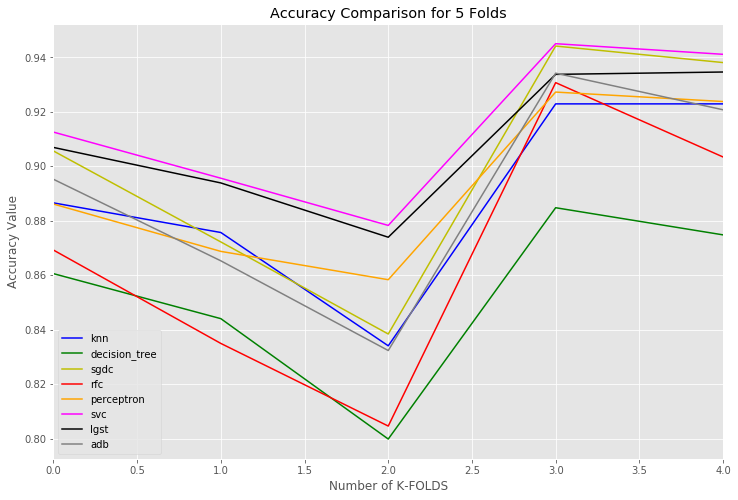

In [48]:
accuracy_line_graph = accuracy_df.plot(kind='line',figsize=(12, 8),rot=0,color=['b','g','y','r','orange','magenta','black','grey'],title="Accuracy Comparison for 5 Folds")
accuracy_line_graph.set_xlabel("Number of K-FOLDS")
accuracy_line_graph.set_ylabel("Accuracy Value")

<h1> Applying Models with all three Sentiments </h1>

<h1> ANN </h1>

In [49]:
twitter_data['text'].apply(lambda x: x.lower()) #transforming text to lowercase
twitter_data['text'] = twitter_data['text'].apply(lambda x: re.sub('[^a-zA-z0-9\s]', '', x))

In [50]:
calculate_token = Tokenizer(num_words=5000, split=" ")
calculate_token.fit_on_texts(twitter_data['text'].values)

X_data = calculate_token.texts_to_sequences(twitter_data['text'].values)
X_data = pad_sequences(X_data)

In [51]:
model_for_ann = Sequential()
model_for_ann.add(Embedding(6000, 256, input_length=X_data.shape[1]))
model_for_ann.add(Dropout(0.3))
model_for_ann.add(LSTM(256, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model_for_ann.add(LSTM(256, dropout=0.3, recurrent_dropout=0.2))
model_for_ann.add(Dense(3, activation='softmax'))

W0818 18:23:04.506877 4566894016 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0818 18:23:04.590412 4566894016 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0818 18:23:04.607281 4566894016 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0818 18:23:04.630489 4566894016 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0818 18:23:04.641039 4566894016 deprecati

In [52]:
model_for_ann.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_for_ann.summary()

W0818 18:23:06.189722 4566894016 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0818 18:23:06.229254 4566894016 deprecation_wrapper.py:119] From /anaconda3/lib/python3.7/site-packages/keras/backend/tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_1 (Embedding)      (None, 33, 256)           1536000   
_________________________________________________________________
dropout_1 (Dropout)          (None, 33, 256)           0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 33, 256)           525312    
_________________________________________________________________
lstm_2 (LSTM)                (None, 256)               525312    
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 771       
Total params: 2,587,395
Trainable params: 2,587,395
Non-trainable params: 0
_________________________________________________________________


In [53]:
get_predictions = pd.get_dummies(twitter_data['airline_sentiment']).values

In [54]:
X_train_data, X_test_data, y_train_data, y_test_data = train_test_split(X_data, get_predictions, test_size=0.2, random_state=0)

In [55]:
starting_timing = time.time()
model_for_ann.fit(X_train_data, y_train_data, epochs=8, batch_size=32, verbose=1)
print("completed in = ",time.time() - starting_timing)

W0818 18:23:06.560960 4566894016 deprecation.py:323] From /anaconda3/lib/python3.7/site-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Epoch 1/8
11712/11712 [==============================] - 110s 9ms/step - loss: 0.6583 - acc: 0.7249
Epoch 2/8
11712/11712 [==============================] - 103s 9ms/step - loss: 0.4537 - acc: 0.8250
Epoch 3/8
11712/11712 [==============================] - 104s 9ms/step - loss: 0.3625 - acc: 0.8633
Epoch 4/8
11712/11712 [==============================] - 102s 9ms/step - loss: 0.3035 - acc: 0.8881
Epoch 5/8
11712/11712 [==============================] - 105s 9ms/step - loss: 0.2519 - acc: 0.9074
Epoch 6/8
11712/11712 [==============================] - 100s 8ms/step - loss: 0.2156 - acc: 0.9220
Epoch 7/8
11712/11712 [==============================] - 100s 9ms/step - loss: 0.1866 - acc: 0.9320
Epoch 8/8
11712/11712 [==============================] - 101s 9ms/step - loss: 0.1604 - acc: 0.9420
completed in =  826.9409370422363


In [56]:
predictions_for_ann = model_for_ann.predict(X_test_data)

In [57]:
positive_count, neutral_count, negative_count = 0, 0, 0
real_positive, real_neutral, real_negative = 0, 0, 0
for i, predictions in enumerate(predictions_for_ann):
    if np.argmax(predictions)==2:
        positive_count += 1
    elif np.argmax(predictions)==1:
        neutral_count += 1
    else:
        negative_count += 1
    
    if np.argmax(y_test_data[i])==2:
        real_positive += 1
    elif np.argmax(y_test_data[i])==1:    
        real_neutral += 1
    else:
        real_negative +=1

print('Positive predictions are :', positive_count)
print('Neutral predictions are: ', neutral_count)
print('Negative predictions are: ', negative_count)
print('Real positive are: ', real_positive)
print('Real neutral are: ', real_neutral)
print('Real negative: ', real_negative)

Positive predictions are : 394
Neutral predictions are:  557
Negative predictions are:  1977
Real positive are:  444
Real neutral are:  614
Real negative:  1870


<h1>Other Models using all three sentiments</h1>

<h3> Data Preprocessing for three sentiments</h3>

In [58]:
all_three_sentiments_data=twitter_data

In [59]:
training_sample,testing_sample = train_test_split(twitter_data,test_size=0.2,random_state=42)

In [60]:
c_v_all = CountVectorizer()
X_vector_all = c_v_all.fit_transform(all_three_sentiments_data['cleaned_tweets'])

ttfidf_transformer = TfidfTransformer(norm='l2')
X_all = ttfidf_transformer.fit_transform(X_vector_all)
y_all = all_three_sentiments_data['airline_sentiment']

In [61]:
X_vector_all_copy = c_v_all.fit_transform(all_three_sentiments_data['text'])
X_all_copy = ttfidf_transformer.fit_transform(X_vector_all_copy)
y_all_copy = all_three_sentiments_data['airline_sentiment']

<h3> KNN Algorithm </h3>

In [62]:
accuracy_list_all_three_sentiments=OrderedDict()
accuracy_mean_list_all_three=[]

In [63]:
def knn_working_all_three(X,y):
    kfolds = KFold(n_splits=5)
    train_test_data_x = kfolds.split(X)
    train_test_data, train_test_data_cp = tee(train_test_data_x)
    accuracy_list=[]
    starting_timing = time.time()
    print('Running for KNN for all three sentiment for 5 folds using K-fold')
    for td in train_test_data_x:
        yyy = np.array(y)
        x_d = X[td[0],:]
        y_d = ((yyy))[td[0]]
        knn_= KNeighborsClassifier(n_neighbors=12)
        calculate_knn=knn_.fit(x_d, y_d)
        yy_predictions = calculate_knn.predict(X[td[1]])
        accuracy = accuracy_score(yy_predictions,testing_sample['airline_sentiment'])
        accuracy_list.append(accuracy)
    accuracy = accuracy_score(yy_predictions,testing_sample['airline_sentiment'])
    returned_val= confusion_matrix(yy_predictions,testing_sample['airline_sentiment'])
    print("completed in = ",time.time() - starting_timing)
    print("Confusion Matrix is \n",returned_val)
    print("Mean Accuracy for KNN for all three Sentiments for 5 folds is ",sum(accuracy_list)/5)
    accuracy_list_all_three_sentiments['knn']=accuracy_list
    accuracy_mean_list_all_three.append(sum(accuracy_list)/5)
knn_working_all_three(X_all_copy,y_all_copy)

Running for KNN for all three sentiment for 5 folds using K-fold
completed in =  8.970637798309326
Confusion Matrix is 
 [[1522  450  362]
 [ 168   68   48]
 [ 199   62   49]]
Mean Accuracy for KNN for all three Sentiments for 5 folds is  0.5346311475409836


<h3> Decision Tree</h3>

In [64]:
def decision_tree_all_three(X,y):
    kfolds = KFold(n_splits=5)
    train_test_data_x = kfolds.split(X)
    train_test_data, train_test_data_cp = tee(train_test_data_x)
    accuracy_list=[]
    starting_timing = time.time()
    print('Running for Decision Tree for all three sentiment for 5 folds using K-fold')
    for td in train_test_data_x:
        yyy = np.array(y)
        x_d = X[td[0],:]
        y_d = ((yyy))[td[0]]
        ddtt_= DecisionTreeClassifier()
        calculate_ddtt=ddtt_.fit(x_d, y_d)
        yy_predictions = calculate_ddtt.predict(X[td[1]])
        accuracy = accuracy_score(yy_predictions,testing_sample['airline_sentiment'])
        accuracy_list.append(accuracy)
    accuracy = accuracy_score(yy_predictions,testing_sample['airline_sentiment'])
    returned_val= confusion_matrix(yy_predictions,testing_sample['airline_sentiment'])
    print("completed in = ",time.time() - starting_timing)
    print("Confusion Matrix is \n",returned_val)
    print("Mean Accuracy for Decision Tree for all three Sentiments for 5 folds is ",sum(accuracy_list)/5)
    accuracy_list_all_three_sentiments['dt']=accuracy_list
    accuracy_mean_list_all_three.append(sum(accuracy_list)/5)
decision_tree_all_three(X_all,y_all)

Running for Decision Tree for all three sentiment for 5 folds using K-fold
completed in =  12.805677890777588
Confusion Matrix is 
 [[1279  388  304]
 [ 356  111   92]
 [ 254   81   63]]
Mean Accuracy for Decision Tree for all three Sentiments for 5 folds is  0.48196721311475416


<h3> Stochastic Gradient Descent Algorithm</h3>

In [65]:
def sgdc_all_three(X,y):
    kfolds = KFold(n_splits=5)
    train_test_data_x = kfolds.split(X)
    train_test_data, train_test_data_cp = tee(train_test_data_x)
    accuracy_list=[]
    starting_timing = time.time()
    print('Running for SGDC for all three sentiment for 5 folds using K-fold')
    for td in train_test_data_x:
        yyy = np.array(y)
        x_d = X[td[0],:]
        y_d = ((yyy))[td[0]]
        sggdc_= SGDClassifier(loss = 'log')
        calculate_sggdc=sggdc_.fit(x_d, y_d)
        yy_predictions = calculate_sggdc.predict(X[td[1]])
        accuracy = accuracy_score(yy_predictions,testing_sample['airline_sentiment'])
        accuracy_list.append(accuracy)
    accuracy = accuracy_score(yy_predictions,testing_sample['airline_sentiment'])
    returned_val= confusion_matrix(yy_predictions,testing_sample['airline_sentiment'])
    print("completed in = ",time.time() - starting_timing)
    print("Confusion Matrix is \n",returned_val)
    print("Mean Accuracy for SGDC for all three Sentiments for 5 folds is ",sum(accuracy_list)/5)
    accuracy_list_all_three_sentiments['sgdc']=accuracy_list
    accuracy_mean_list_all_three.append(sum(accuracy_list)/5)
sgdc_all_three(X_all_copy,y_all_copy)

Running for SGDC for all three sentiment for 5 folds using K-fold


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


completed in =  0.4066448211669922
Confusion Matrix is 
 [[1623  494  396]
 [ 114   36   31]
 [ 152   50   32]]
Mean Accuracy for SGDC for all three Sentiments for 5 folds is  0.5445355191256831


<h3> Random Forest Classifier </h3>

In [66]:
def random_forest_all_three(X,y):
    kfolds = KFold(n_splits=5)
    train_test_data_x = kfolds.split(X)
    train_test_data, train_test_data_cp = tee(train_test_data_x)
    accuracy_list=[]
    starting_timing = time.time()
    print('Running for Random Forest for all three sentiment for 5 folds using K-fold')
    for td in train_test_data_x:
        yyy = np.array(y)
        x_d = X[td[0],:]
        y_d = ((yyy))[td[0]]
        rffc_=  RandomForestClassifier()
        calculate_rffc=rffc_.fit(x_d, y_d)
        yy_predictions = calculate_rffc.predict(X[td[1]])
        accuracy = accuracy_score(yy_predictions,testing_sample['airline_sentiment'])
        accuracy_list.append(accuracy)
    accuracy = accuracy_score(yy_predictions,testing_sample['airline_sentiment'])
    returned_val= confusion_matrix(yy_predictions,testing_sample['airline_sentiment'])
    print("completed in = ",time.time() - starting_timing)
    print("Confusion Matrix is \n",returned_val)
    print("Mean Accuracy for Random Forest for all three Sentiments for 5 folds is ",sum(accuracy_list)/5)
    accuracy_list_all_three_sentiments['rfc']=accuracy_list
    accuracy_mean_list_all_three.append(sum(accuracy_list)/5)
random_forest_all_three(X_all_copy,y_all_copy)

Running for Random Forest for all three sentiment for 5 folds using K-fold


/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The de

completed in =  13.349563121795654
Confusion Matrix is 
 [[1605  490  386]
 [ 156   46   50]
 [ 128   44   23]]
Mean Accuracy for Random Forest for all three Sentiments for 5 folds is  0.5577868852459016


<h3> Perceptron </h3>

In [67]:
def perceptron_all_three(X,y):
    kfolds = KFold(n_splits=5)
    train_test_data_x = kfolds.split(X)
    train_test_data, train_test_data_cp = tee(train_test_data_x)
    accuracy_list=[]
    starting_timing = time.time()
    print('Running for Perceptron for all three sentiment for 5 folds using K-fold')
    for td in train_test_data_x:
        yyy = np.array(y)
        x_d = X[td[0],:]
        y_d = ((yyy))[td[0]]
        ppdd_=  Perceptron(tol=1e-3, random_state=0)
        calculate_ppdd=ppdd_.fit(x_d, y_d)
        yy_predictions = calculate_ppdd.predict(X[td[1]])
        accuracy = accuracy_score(yy_predictions,testing_sample['airline_sentiment'])
        accuracy_list.append(accuracy)
    accuracy = accuracy_score(yy_predictions,testing_sample['airline_sentiment'])
    returned_val= confusion_matrix(yy_predictions,testing_sample['airline_sentiment'])
    print("completed in = ",time.time() - starting_timing)
    print("Confusion Matrix is \n",returned_val)
    print("Mean Accuracy for Perceptron for all three Sentiments for 5 folds is ",sum(accuracy_list)/5)
    accuracy_list_all_three_sentiments['perceptron']=accuracy_list
    accuracy_mean_list_all_three.append(sum(accuracy_list)/5)
perceptron_all_three(X_all_copy,y_all_copy)

Running for Perceptron for all three sentiment for 5 folds using K-fold
completed in =  0.40602707862854004
Confusion Matrix is 
 [[1507  437  367]
 [ 151   53   32]
 [ 231   90   60]]
Mean Accuracy for Perceptron for all three Sentiments for 5 folds is  0.4937841530054644


<h3> Support Vector Classifier </h3>

In [68]:
def svcc_all_three(X,y):
    kfolds = KFold(n_splits=5)
    train_test_data_x = kfolds.split(X)
    train_test_data, train_test_data_cp = tee(train_test_data_x)
    accuracy_list=[]
    starting_timing = time.time()
    print('Running for SVC for all three sentiment for 5 folds using K-fold')
    for td in train_test_data_x:
        yyy = np.array(y)
        x_d = X[td[0],:]
        y_d = ((yyy))[td[0]]
        svcc_dd_=  SVC(kernel="rbf", C=100., gamma=0.01, probability=False, degree=3)
        calculate_svcc_dd=svcc_dd_.fit(x_d, y_d)
        yy_predictions = calculate_svcc_dd.predict(X[td[1]])
        accuracy = accuracy_score(yy_predictions,testing_sample['airline_sentiment'])
        accuracy_list.append(accuracy)
    accuracy = accuracy_score(yy_predictions,testing_sample['airline_sentiment'])
    returned_val= confusion_matrix(yy_predictions,testing_sample['airline_sentiment'])
    print("completed in = ",time.time() - starting_timing)
    print("Confusion Matrix is \n",returned_val)
    print("Mean Accuracy for SVC for all three Sentiments for 5 folds is ",sum(accuracy_list)/5)
    accuracy_list_all_three_sentiments['svc']=accuracy_list
    accuracy_mean_list_all_three.append(sum(accuracy_list)/5)
svcc_all_three(X_all_copy,y_all_copy)

Running for SVC for all three sentiment for 5 folds using K-fold
completed in =  96.37404417991638
Confusion Matrix is 
 [[1523  443  373]
 [ 153   52   39]
 [ 213   85   47]]
Mean Accuracy for SVC for all three Sentiments for 5 folds is  0.5040300546448088


<h3> Logistic Regression</h3>

In [69]:
def lgst_all_three(X,y):
    kfolds = KFold(n_splits=5)
    train_test_data_x = kfolds.split(X)
    train_test_data, train_test_data_cp = tee(train_test_data_x)
    accuracy_list=[]
    starting_timing = time.time()
    print('Running for Logistic Regression for all three sentiment for 5 folds using K-fold')
    for td in train_test_data_x:
        yyy = np.array(y)
        x_d = X[td[0],:]
        y_d = ((yyy))[td[0]]
        lgdd_=  LogisticRegression(C=100,solver='liblinear',max_iter=300)
        calculate_lg_dd=lgdd_.fit(x_d, y_d)
        yy_predictions = calculate_lg_dd.predict(X[td[1]])
        accuracy = accuracy_score(yy_predictions,testing_sample['airline_sentiment'])
        accuracy_list.append(accuracy)
    accuracy = accuracy_score(yy_predictions,testing_sample['airline_sentiment'])
    returned_val= confusion_matrix(yy_predictions,testing_sample['airline_sentiment'])
    print("completed in = ",time.time() - starting_timing)
    print("Confusion Matrix is \n",returned_val)
    print("Mean Accuracy for Logistic Regression for all three Sentiments for 5 folds is ",(sum(accuracy_list)/5))
    accuracy_list_all_three_sentiments['lgst']=accuracy_list
    accuracy_mean_list_all_three.append(sum(accuracy_list)/5)
lgst_all_three(X_all_copy,y_all_copy)

Running for Logistic Regression for all three sentiment for 5 folds using K-fold


/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


completed in =  2.7757201194763184
Confusion Matrix is 
 [[1520  435  366]
 [ 152   58   41]
 [ 217   87   52]]
Mean Accuracy for Logistic Regression for all three Sentiments for 5 folds is  0.5010928961748634


<h3> Adaboost Classifier </h3>

In [70]:
def adaboost_all_three(X,y):
    kfolds = KFold(n_splits=5)
    train_test_data_x = kfolds.split(X)
    train_test_data, train_test_data_cp = tee(train_test_data_x)
    accuracy_list=[]
    starting_timing = time.time()
    print('Running for Adaboost Classifier for all three sentiment for 5 folds using K-fold')
    for td in train_test_data_x:
        yyy = np.array(y)
        x_d = X[td[0],:]
        y_d = ((yyy))[td[0]]
        adb_=  AdaBoostClassifier()
        calculate_adb=adb_.fit(x_d, y_d)
        yy_predictions = calculate_adb.predict(X[td[1]])
        accuracy = accuracy_score(yy_predictions,testing_sample['airline_sentiment'])
        accuracy_list.append(accuracy)
    accuracy = accuracy_score(yy_predictions,testing_sample['airline_sentiment'])
    returned_val= confusion_matrix(yy_predictions,testing_sample['airline_sentiment'])
    print("completed in = ",time.time() - starting_timing)
    print("Confusion Matrix is \n",returned_val)
    print("Mean Accuracy for Adaboost for all three Sentiments for 5 folds is ",(sum(accuracy_list)/5))
    accuracy_list_all_three_sentiments['adb']=accuracy_list
    accuracy_mean_list_all_three.append(sum(accuracy_list)/5)
adaboost_all_three(X_all_copy,y_all_copy)

Running for Adaboost Classifier for all three sentiment for 5 folds using K-fold
completed in =  80.87415289878845
Confusion Matrix is 
 [[1154  350  290]
 [ 472  137  120]
 [ 263   93   49]]
Mean Accuracy for Adaboost for all three Sentiments for 5 folds is  0.49678961748633876


<h1> Comparison of Accuracies for 5 folds using all three sentiments</h1>

In [71]:
accuracy_df_all_three=pd.DataFrame.from_dict(accuracy_list_all_three_sentiments)
accuracy_df_all_three_transpose=accuracy_df_all_three.transpose()
accuracy_df_all_three_transpose['Mean Accuracy']=accuracy_mean_list_all_three
accuracy_df_all_three_transpose

,0,1,2,3,4,Mean Accuracy
knn,0.527322,0.520150,0.502391,0.563525,0.559768,0.534631
dt,0.472678,0.481899,0.440915,0.518101,0.496243,0.481967
sgdc,0.551230,0.525273,0.479167,0.589481,0.577527,0.544536
rfc,0.558402,0.554986,0.522199,0.581626,0.571721,0.557787
perceptron,0.482923,0.460724,0.421790,0.550205,0.553279,0.493784
svc,0.502732,0.485314,0.418374,0.559768,0.553962,0.504030
lgst,0.498634,0.473361,0.423497,0.553279,0.556694,0.501093
adb,0.537910,0.487705,0.504098,0.496585,0.457650,0.496790


Text(20.200000000000003, 0.5, 'Accuracy Value')

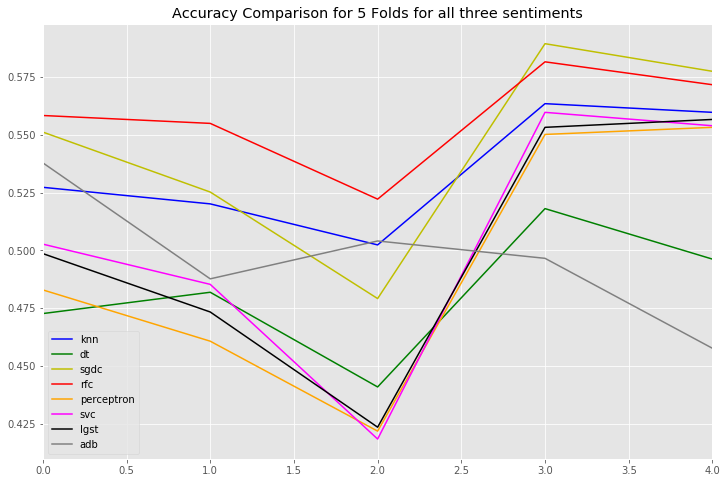

In [72]:
accuracy_line_graph_all_three = accuracy_df_all_three.plot(kind='line',figsize=(12, 8),rot=0,color=['b','g','y','r','orange','magenta','black','grey'],title="Accuracy Comparison for 5 Folds for all three sentiments")
accuracy_line_graph.set_xlabel("Number of K-FOLDS")
accuracy_line_graph.set_ylabel("Accuracy Value")